# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [6]:
x_train = []
y_train = []

for i in range(60 , 1258 ):
  x_train.append(training_set_scaled[i-60 : i  , 0 ]) # upper bound is excluded so at first iteration 0:59 & o is for column num in training_ser_scaled
  y_train.append(training_set_scaled[i , 0 ])# at first iteration i = 60
x_train , y_train = np.array(x_train) , np.array(y_train)





In [8]:
print(x_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [7]:
x_train = np.reshape(x_train ,(x_train.shape[0] , x_train.shape[1] , 1))


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


### Initialising the RNN

In [9]:
regressor = Sequential()


### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50 , return_sequences= True , input_shape =( x_train.shape[1] , 1)))
regressor.add(Dropout(0.2))



### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50 , return_sequences= True ))
regressor.add(Dropout(0.2))




### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50 , return_sequences= True ))
regressor.add(Dropout(0.2))



### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))



### Adding the output layer

In [14]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')


### Fitting the RNN to the Training set

In [16]:
regressor.fit(x_train , y_train , epochs = 100 , batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 12s 108ms/step - loss: 0.0503
Epoch 2/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0079
Epoch 3/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0046
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test= pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[: , 1:2].values



### Getting the predicted stock price of 2017

In [24]:
dataset_total = pd.concat((dataset_train['Open'] , dataset_test['Open']) , axis = 0 )
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values
inputs = inputs.reshape(-1 , 1 )
inputs = sc.transform(inputs)
x_test= []

for i in range(60 , 80):
  x_test.append(inputs[i-60 : i  , 0 ]) # upper bound is excluded so at first iteration 0:59 & o is for column num in training_ser_scaled
x_test  = np.array(x_test)
x_train = np.reshape(x_test ,(x_test.shape[0] , x_test.shape[1] , 1))
predicte_price = regressor.predict(x_test)
predicte_price = sc.inverse_transform(predicte_price)







1/1 [==============================] - 2s 2s/step


In [25]:
print(predicte_price)

[[794.7119 ]
 [791.9578 ]
 [792.02655]
 [793.4536 ]
 [796.87573]
 [802.7669 ]
 [808.2445 ]
 [810.5606 ]
 [810.7964 ]
 [810.32245]
 [809.9344 ]
 [809.7127 ]
 [809.67365]
 [810.311  ]
 [811.34534]
 [815.8093 ]
 [822.64374]
 [830.0787 ]
 [834.2026 ]
 [830.2917 ]]


### Visualising the results

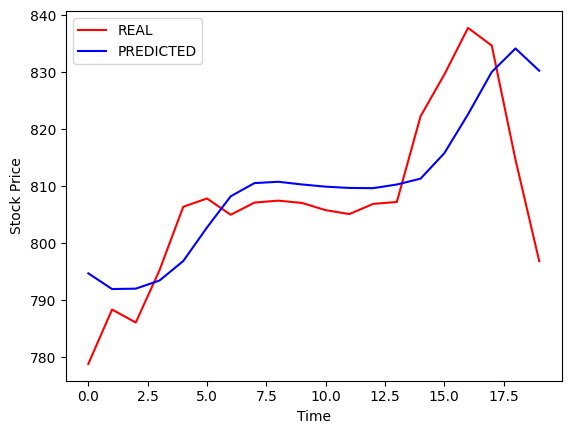

In [27]:
plt.plot(real_stock_price  , color = 'red' , label = 'REAL')
plt.plot(predicte_price , color = 'blue',  label = 'PREDICTED')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()